- 평균값(기댓값), 표본분산, 불편분산(ddof = 1), 표준편차
- 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소추정하는 경향이 있으며 그 경향을 없애기 위한 것이 불편분산임. 표본분산 보다 조금 큰 값이 된다.
- 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 함
- 최댓값, 최솟값, 중앙값, 사분위수

In [2]:
import numpy as np
import pandas as pd

In [2]:
# 1변량 데이터
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

In [3]:
np.sum(fish_data)

40

In [4]:
len(fish_data)

10

In [5]:
# 평균
N = len(fish_data)
sum_value = np.sum(fish_data)
mu = sum_value/N
mu

4.0

In [7]:
np.mean(fish_data)

4.0

In [8]:
# 표본분산
sigma_2_sample = np.sum((fish_data-mu)**2)/N
sigma_2_sample

1.2

In [9]:
np.var(fish_data)

1.2

<img src = '불편분산.jpg' STYLE='width:800px;'>

[표본분산이 분산을 과소평가하는 이유] 

- 분산은 '데이터와 평균값의 간의 거리' 이므로 모평균 간의 거리를 계산 : np.sum((fish_data - mu)**2)/N  
  호수안에 물고기가 7마리 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4,  
  샘플링 3마리 {1,2,3} 표본평균 2  
  이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
  
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N 대신 N-1로 나누어 불편분산을 구할 수 있다.

In [10]:
np.var(fish_data, ddof=0)

1.2

In [11]:
# 불편분산
sigma_2 = np.sum((fish_data-mu)**2)/(N-1)
np.round(sigma_2,2)

1.33

In [12]:
var_2 = np.var(fish_data,ddof=1)
np.round(var_2,2)

1.33

In [13]:
# 표준편차
sigma = np.sqrt(sigma_2)
np.round(sigma,2)

1.15

In [14]:
# std() 함수
std_2 = np.std(fish_data,ddof=1)
np.round(std_2,2)

1.15

In [ ]:
# Q. a의 평균, 분산, 표준편차, 편차의 평균을 구하세요.
# a = np.arange(15)

In [16]:
# A.
a = np.arange(15)
print(a)
m=np.mean(a)
v=np.var(a,ddof=1)
s=np.std(a,ddof=1)
print(m)
print(v)
print(s)
np.mean(a-m)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
7.0
20.0
4.47213595499958


0.0

In [18]:
max1 = np.amax(fish_data)
min1 = np.amin(fish_data)
med1 = np.median(fish_data)
print(max1)
print(min1)
print(med1)

6
2
4.0


In [ ]:
!conda install scipy

In [21]:
fish_data_2 = np.array([2,3,3,4,4,4,4,5,5,1000])

In [24]:
np.mean(fish_data_2)

103.4

In [25]:
# 평균값은 이상치의 영향을 크게 받지만 중앙값은 이상치에 덜 민감함
np.median(fish_data_2)

4.0

In [23]:
# 사분위수
from scipy import stats
stats.scoreatpercentile(fish_data_2, 25)

3.25

- 그룹별 통계량 : mean(), std(), describe()
- 교차분석표 : pivot_table()
- 깔끔한 데이터 : 행 하나에 1개의 결과가 있도록 정리. 교차분석표는 행이 변수의 의미를 갖는 경향이 있음
- 공분산 :
 - 공분산 : 2개의 연속형 변수의 관계성을 확인하는 통계량
 - 공분산이 0보다 클 때 : 변수 한쪽이 큰 값을 갖게되면 다른 한 쪽도 커짐
 - 공분산이 0보다 작을 때 : 변수 한쪽이 큰 값을 갖게되면 다른 한 쪽도 작아짐
 - 공분산이 0일 때 : 변수 사이에 관계성이 없음
 - 공분산은 편리한 지표지만 최대값이나 최소값이 얼마가 될 지 알 수가 없으며
 - 단위가 cm에서 m로 변하면 공분산의 값도 변함. 사용이 편하도록 -1 ~ +1의 범위로 보정
- 피어슨 상관계수 : 공분산을 최대값 1, 최소값 -1 사이가 되도록 표준화
 - cov / sp.sqrt(sigma_2_x * sigma_2_y)
 - 상관행렬 : 여러 변수의 상관계수들을 행렬 형태로 정리
 - 상관계수가 무의미할 때 : 상관계수가 0에 가까운 값을 가질 때는 실제 그래프로 관계를 확인

In [26]:
import pandas as pd
fish_multi = pd.read_csv('dataset/5_2_fm.csv')
fish_multi

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [28]:
# 그룹별 통계량 계산
group = fish_multi.groupby('species')
print(group.mean())

         length
species        
A             3
B             8


In [29]:
print(group.std(ddof=1))

         length
species        
A           1.0
B           2.0


In [30]:
group.describe()

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

In [31]:
shoes = pd.read_csv('dataset/5_2_shoes.csv')
shoes

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [32]:
cross = pd.pivot_table(
        data = shoes,
        values = 'sales',
        aggfunc = 'sum',
        index = 'store',
        columns = 'color'
)
cross

color,blue,red
store,,
osaka,13,9
tokyo,10,15


In [33]:
cov_data = pd.read_csv('dataset/4_cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


In [35]:
# 공분산 
x = cov_data['x']
y = cov_data['y']
N = len(cov_data)
mu_x=np.mean(x)
mu_y=np.mean(y)
cov_sample = sum((x-mu_x)*(y-mu_y))/(N-1)
np.round(cov_sample,2)

7.67

In [36]:
# 피어슨 상관계수
sigma_2_x = np.var(x, ddof=1)
sigma_2_y = np.var(y, ddof=1)
rho = cov_sample/np.sqrt(sigma_2_x*sigma_2_y)
round(rho,2)

0.76

In [37]:
# 공분산 행렬
np.cov(x,y,ddof=1)

array([[ 3.64622222,  7.67333333],
       [ 7.67333333, 28.01111111]])

In [38]:
# 상관행렬
np.corrcoef(x,y)

array([[1.       , 0.7592719],
       [0.7592719, 1.       ]])

[모집단 분포와 표본분포]  

- 모집단: 어떤 통계적 실험의 대상이 되는 모든 대상물. ex. 대한민국 모든 남성의 키 데이터, 2018 수능점수 데이터
- 모집단 분포: 모집단은 데이터 집단이므로 어떠한 분포를 이루며 이 데이터가 이루는 확률 분포가 모집단 분포
- 모수: 모집단의 특성을 나타내는 수치로 모평균,모분산,모표준편차,모비율,모상관관계 등  
  수능점수 전체데이터를 알고 싶은 것이 아니라 전체 수능점수 평균, 표준편차를 알고 싶어한다.
  수능점수와 달리 일반적으로 대부분의 모집단 분포는 완전하게 알려진 것이 없으며 전수조사는 경제적, 공간적, 시간적 제약으로 인해 거의 불가능
- 표본: 모집단의 모수(특성)을 알기 위하여 표본을 추출해서 모집단의 모수를 추정
- 확률표본:  모집단을 구성하는 모든 구성원이 표본으로 뽑힐 확률을 동일하게 하여 추출한 표본. Random이란 무작위라는 의미로, 어떠한 의도를 가지지 않는다는 것을 의미하며, 모든 구성원이 뽑힐 확률이 동일하다는 개념. 
- 통계량: 확률표본의 특성을 설명하는 값으로 표본평균, 표본분산, 표본표준편차, 표본비율, 표본상관관계 등  
  모수는 모집단이 변하지 않기 때문에 그 값이 변하지 않으나 통계량은 표본을 어떻게 추출하느냐에 따라서 그 값이 다르게 나타난다.
- 확률변수: 무작위 실험을 했을 때 특정 확률로 발생하는 각각의 결과를 수치값으로 표현한 변수. 동전의 앞과 뒤
- 확률분포: 확률변수 X의 모든 값과 그 에 대응하는 확률값들의 분포. 동전의 앞 0.5, 뒤 0.5 
- 무작위로 표본 30개씩 반복해서 100번 추출하면 100번 추출한 표본 30개의 평균값들을 100개 구할 수 있다. 추출된 표본들의 각 평균값들에 대한 발생 분포를 그려보면 특정 확률변수에 대응하는 확률을 가진 확률 분포를 그릴 수 있다. 이것을 통계량의 확률분포라고 할 수 있고 이를 표본분포라고 부른다. 
- 통계량이 확률 변수라는 의미: 확률변수의 확률분포가 수학적으로 설명가능한 분포(예, 정규분포)를 따른다고 하면 특정 확률변수와 확률함수를 알고 있다면 특정 사건이 일어날 확률을 계산할 수 있으며 더 나아가 모수와 통계량의 관계를 알고 있다면 그것을 통해 모수에 대한 통계적인 추정을 할 수 있다. 즉 통계량의 확률 함수 또는 표본 분포를 안다고 가정하면 이를 이용해 모수를 추정할 수 있다. 


#### 표본통계량 성질
- 샘플사이즈가 크면 표본평균은 모평균에 가까워진다.
- 샘플사이즈가 커질수록 표본평균의 표준편차가 작아짐. 샘플사이즈를 크게 하면 흩어짐이 적은 신뢰할 수 있는 표본평균을 얻을 수 있다.
- 표준오차는이론상 표본평균의 표준편차 크기인데 샘플사이즈가 커지면 표준오차는 작아짐
- 모분산은 0.64, 표본분산의 평균값은 0.575로 분산이 과소평가되어짐 -> 불편분산을 사용, 편향을 제거(ddof =1)
- 샘플사이즈가 커질수록 불편분산은 모분산(0.64)에 가까워짐
- 불편성 : 추정량의 기댓값이 진짜 모수(모집단의 파라미터)가 되는 특성. 편향이 없는 추정량
- 일치성 : 샘플사이즈가 커지면 추정량이 진짜 모수에 가까워지는 특성
- 표본평균과 불편분산은 둘다 불편성을 가지고 있다고 할 수 있다.
- 샘플사이즈를 크게 하면 표본평균은 모평균에 가까워지고 불편분산은 모분산에 가까워지므로 일치성을 가짐
- 큰수의 법칙 : 표본의 크기가 커지면 표본평균이 모평균에 가까워지는 방법을 표현한 법칙
- 중심극한정리 : 모집단분포가 무엇이든지간에 샘플사이즈가 커지면 확률변수의 합은 정규분포에 가까워짐

In [1]:
import pandas as pd
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
# 평균 4, 표준편차 0.8인 정규분포
population = stats.norm(loc=4,scale=0.8)
population.rvs(size=10)

array([5.15899041, 5.46333831, 3.60703566, 5.31889213, 4.56338858,
       3.60506539, 3.3660258 , 4.03910745, 5.68414159, 4.90517489])

In [44]:
# 길이가 10000개인 배열
sample_mean_array = np.zeros(10000)
sample_mean_array[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
# 배열에 샘플사이즈 10인 표본 10000개의 표본평균을 저장
np.random.seed(1)
for i in range(0,10000):
    sample = population.rvs(size=10)
    sample_mean_array[i] = np.mean(sample)


In [48]:
# 10000개의 표본의 평균값으로 구성된 배열
sample_mean_array

array([3.92228729, 3.86432929, 4.06953003, ..., 4.13616562, 4.57489661,
       4.09896685])

In [50]:
# 표본평균의 평균값
round(np.mean(sample_mean_array),2)

4.0

In [51]:
# 표본평균의 표준편차
np.std(sample_mean_array,ddof=1)

0.2513580850860402

<AxesSubplot:ylabel='Density'>

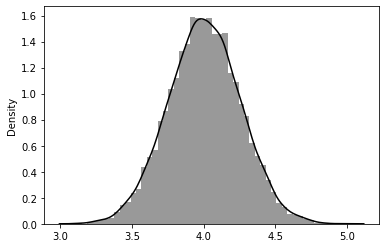

In [53]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(sample_mean_array, color='black')

In [57]:
# 샘플사이즈 변화
size_array = np.arange(10,100100,100)
len(size_array)

1001

In [58]:
sample_mean_array_size = np.zeros(len(size_array))

In [60]:
# 샘플사이즈를 변화시키면서 표본평균을 도출하는 시뮬레이션
np.random.seed(1)
for i in range(0,len(size_array)):
    sample = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample)

Text(0, 0.5, 'sample mean')

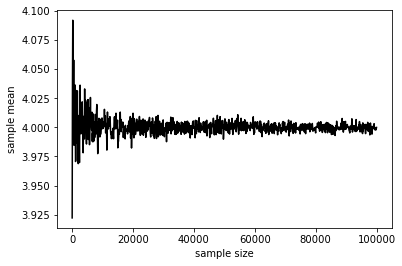

In [61]:
# 샘플사이즈가 커질수록 표본평균이 모평균(4)에 가까워짐
plt.plot(size_array, sample_mean_array_size,
        color = 'black')
plt.xlabel('sample size')
plt.ylabel('sample mean')

In [62]:
# 사용자 함수(표본평균 계산)
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size=size)
        sample_mean_array[i] = np.mean(sample)
    return(sample_mean_array)

In [63]:
np.random.seed(1)
np.mean(calc_sample_mean(size=10, n_trial= 10000))

4.004202422791747

In [64]:
# 샘플사이즈 10
size_10 = calc_sample_mean(size=10, n_trial=10000)
size_10_df = pd.DataFrame({
    'sample_mean':size_10,
    'size':np.tile('size_10',10000)
})
# 샘플사이즈 20
size_20 = calc_sample_mean(size=20, n_trial=10000)
size_20_df = pd.DataFrame({
    'sample_mean':size_20,
    'size':np.tile('size_20',10000)
})
# 샘플사이즈 30
size_30 = calc_sample_mean(size=30, n_trial=10000)
size_30_df = pd.DataFrame({
    'sample_mean':size_30,
    'size':np.tile('size_30',10000)
})
# 종합
sim_result = pd.concat(
    [size_10_df, size_20_df, size_30_df])

sim_result

,sample_mean,size
0,4.157977,size_10
1,3.885392,size_10
2,3.849641,size_10
3,3.949847,size_10
4,3.585045,size_10
...,...,...
9995,4.043529,size_30
9996,3.923993,size_30
9997,4.090783,size_30
9998,4.086999,size_30


<AxesSubplot:xlabel='size', ylabel='sample_mean'>

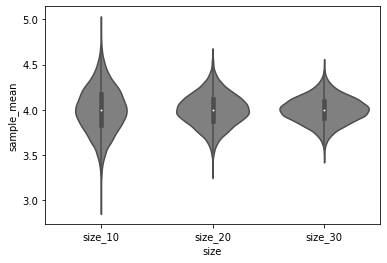

In [67]:
# 샘플사이즈가 커질수록 표본평균의 흩어지는 정도가 작아져서 모평균에 가깝게 모임
sns.violinplot(x='size',y='sample_mean',
               data=sim_result,color='gray')

In [68]:
# 샘플사이즈별 표본평균의 표준편차
size_array = np.arange(2,102,2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [69]:
# 표본평균의 표준편차를 저장할 변수
sample_mean_std_array = np.zeros(len(size_array))

In [71]:
# 시뮬레이션 실행
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size=size_array[i], n_trial=100)
    sample_mean_std_array[i] = np.std(sample_mean,ddof=1)

Text(0, 0.5, 'mean std value')

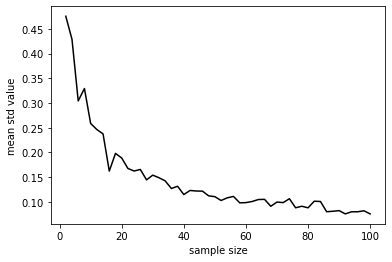

In [72]:
# 샘플사이즈가 커질수록 표본평균의 표준편차가 작아짐
plt.plot(size_array, sample_mean_std_array, color= 'black')
plt.xlabel('sample size')
plt.ylabel('mean std value')

In [73]:
# 평균 4, 표준편차 0.8인 정규분포
population = stats.norm(loc = 4, scale = 0.8)
population.rvs(size=10)

array([5.24892732, 4.24665779, 4.28633492, 3.77992655, 4.54537261,
       2.71040195, 3.86477255, 4.61453698, 5.57570911, 4.17974563])

In [74]:
# 샘플사이즈별 표본평균의 표준편차
size_array =  np.arange(
    start = 2, stop = 102, step = 2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [75]:
# 표준오차 : 표본평균과 모평균과의 표준적인 차이. 평균의 추정치에 대한 불확실도 수치화
# 샘플사이즈가 커지면 표준오차는 작아짐

standard_error = 0.8/np.sqrt(size_array)
standard_error

array([0.56568542, 0.4       , 0.32659863, 0.28284271, 0.25298221,
       0.23094011, 0.21380899, 0.2       , 0.18856181, 0.17888544,
       0.17056057, 0.16329932, 0.15689291, 0.15118579, 0.14605935,
       0.14142136, 0.13719887, 0.13333333, 0.12977714, 0.12649111,
       0.12344268, 0.12060454, 0.11795356, 0.11547005, 0.11313708,
       0.11094004, 0.10886621, 0.1069045 , 0.10504515, 0.10327956,
       0.1016001 , 0.1       , 0.09847319, 0.09701425, 0.09561829,
       0.0942809 , 0.09299811, 0.09176629, 0.09058216, 0.08944272,
       0.08834522, 0.08728716, 0.08626622, 0.08528029, 0.0843274 ,
       0.08340577, 0.0825137 , 0.08164966, 0.0808122 , 0.08      ])

Text(0, 0.5, 'mean std value')

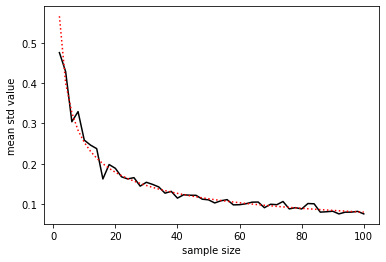

In [78]:
# 시뮬레이션 결과와 표준오차의 값이 거의 일치함
# 표본오차는 샘플사이즈를 크게 할수록 모평균에서 떨어진 정도는 작아진다.
plt.plot(size_array, sample_mean_std_array, color='black')
plt.plot(size_array, standard_error, color='red', linestyle='dotted')
plt.xlabel('sample size')
plt.ylabel('mean std value')

In [79]:
# 표본분산 저장 변수
sample_var_array = np.zeros(10000)

In [80]:
# 시뮬레이션 실행 : 모분산(0.64) 대비 과소평가
np.random.seed(1)
for i in range(0,10000):
    sample = population.rvs(size=10)
    sample_var_array[i] = np.var(sample,ddof=0)

In [81]:
np.mean(sample_var_array)

0.5746886877332101

In [83]:
# 불편분산의 평균값은 모분산(0.64)으로 간주
unbias_var_array = np.zeros(10000)
np.random.seed(1)
for i in range(0,10000):
    sample=population.rvs(size=10)
    unbias_var_array[i] = np.var(sample, ddof=1)
np.mean(unbias_var_array)

0.6385429863702334

In [84]:
size_array = np.arange(10,100100,100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [85]:
unbias_var_array_size=np.zeros(len(size_array))

In [86]:
np.random.seed(1)
for i in range(0,len(size_array)):
    sample = population.rvs(size=size_array[i])
    unbias_var_array_size[i] = np.var(sample,ddof=1)

Text(0, 0.5, 'unbias var')

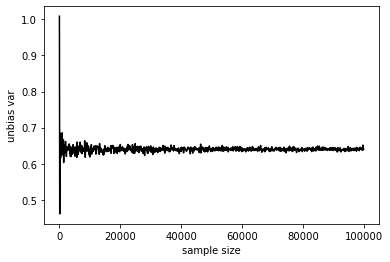

In [87]:
# 샘플사이즈가 크면 불편분산은 모분산(0.64)에 가까워진다.
plt.plot(size_array,unbias_var_array_size, color='black')
plt.xlabel('sample size')
plt.ylabel('unbias var')

[통계량 선정시 평가기준]  
- 불편성: 표본으로부터 구한 통계량의 기대치가 추정하려 하는 모수의 실제 값에 같거나 가까워지는 성질을 의미
- 효율성: 모수 추정시 분산이 작을수록 모수를 정확하게 추정할 가능성이 높다.
- 일치성: 표본의 크기가 커감에 따라서 표본의 통계량이 모집단의 모수와 일치하는 것을 의미
- 충분성: 동일한 표본으로부터 얻은 추정량이 모집단의 모수에 대한 정보를 더 많이 제공하는 것을 의미

정규분포는 연속확률분포로서 가장 자주 쓰이는 확률분포입니다. 모양은 평균을 중심으로 하나의 봉우리형태를 띄며 한 집단의 많은 사람들의 키, 몸무게, 시험성적 등의 데이터에 잘 나타나는 분포

- 누적분포함수 : 확률분포에서 얻은 확률변수 3 이하가 되는 확률. Cumulative density function
 - stats.norm.cdf(loc = 4, scale = 0.8, x = 3)
- 정규분포의 확률밀도 계산
 - 확률변수 3일때의 확률밀도 N(3|4,0.8**2)
 - stats.norm.pdf(loc = 4, scale = 0.8, x = 3)  Probability density function
- 하측확률 : "확률변수 x가 N보다 낮을 확률은 M퍼센트다" 에서 N을 고정하고 M을 구하는 경우
 - 이때의 M이 하측확률이며 M(확률)을 고정하고 N(변수)을 구하는 경우 이때의 N이 퍼센트포인트 하측확률이 2.5%가 되는 퍼센트포인트
 - stats.norm.ppf(loc = 4, scale = 0.8, q = 0.025) Percent point function
- stats.norm.pdf(x=x)로 하여 loc와 scale을 지정하지 않을 경우 표준정규분포가 됨. probability density function
- stats.norm.rvs() 함수는 정규확률분포로부터 난수 생성. Random variates
- t분포의 의미 : 모분산을 모르는 상황에서도 표본평균의 분포에 대해 애기할 수 있으며
 - t분포를 만들 때 표본에서 계산한 포준오차로 표본평균을 표준화함
 - 표본에서 계산한 표준오차로 표본평균을 표준화했을 경우의 결과가 t분포를 따른다는 사실을 이용하면 얻어낸 표본평균에 관한 불확실성을 짐작할 수 있음.

In [88]:
# 원주율
np.pi

3.141592653589793

In [89]:
np.exp(1)

2.718281828459045

In [90]:
# 정규분포의 확률밀도 계산
# 확률변수 3일때의 확률밀도: N(3|4,0.8**2)
x=3
mu=4
sigma=0.8
1/(np.sqrt(2*np.pi*sigma**2))*sp.exp(-((x-mu)**2)/(2*sigma**2))

0.22831135673627742

In [5]:
# 평균 4, 표준편차 0.8, 확률변수 3일때 확률밀도 계산
stats.norm.pdf(loc=4,scale=0.8,x=4)

0.49867785050179086

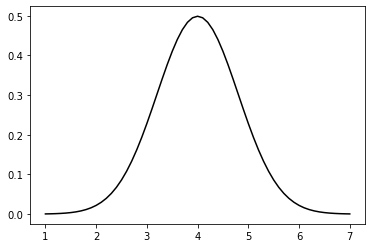

In [4]:
x_plot=np.arange(1,7.1,0.1)
plt.plot(x_plot,stats.norm.pdf(x=x_plot,loc=4,scale=0.8),color='black')

In [93]:
# 정규분포의 인스턴스 생성
norm_dist = stats.norm(loc=4,scale=0.8)
norm_dist.pdf(x=3)
# norm_dist.pdf(x=4)

0.49867785050179086

In [95]:
# 표본이 어떤 값 이하기 되는 비율
np.random.seed(1)
simulated_sample = stats.norm.rvs(
    loc = 4, scale = 0.8, size=100000)
simulated_sample

array([5.29947629, 3.51059487, 3.5774626 , ..., 4.06498025, 4.27523694,
       3.401955  ])

In [96]:
np.sum(simulated_sample <= 3)

10371

In [97]:
np.sum(simulated_sample <= 3)/len(simulated_sample)

0.10371

In [8]:
# 누적분포함수 : 확률분포에서 얻은 확률변수 3 이하가 되는 확률
stats.norm.cdf(loc=4,scale=0.8,x=7)

0.9999115827147992

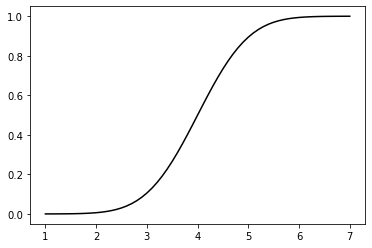

In [7]:
x_plot=np.arange(1,7.1,0.1)
plt.plot(x_plot,stats.norm.cdf(x=x_plot,loc=4,scale=0.8),color='black')

In [99]:
stats.norm.cdf(loc=4,scale=0.8,x=4)

0.5

In [100]:
# 퍼센트포인트를 주고 하측확률 산출
stats.norm.ppf(loc=4,scale=0.8,q=0.025)

2.4320288123679563

In [101]:
# 하측확률이 50%가 되는 퍼센트포인트는 평균과 일치
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.5)

4.0

In [102]:
# 하측확률과 퍼센트포인트의 관계
lower = stats.norm.cdf(loc = 4, scale = 0.8, x = 3)
print(lower)
stats.norm.ppf(loc = 4, scale = 0.8, q = lower)

0.10564977366685535


3.0000000000000004

t분포는 모집단이 정규분포를 하더라도 분산 σ²이 알려져 있지 않고 표분의 수가 적은 경우에, 평균 μ에 대한 신뢰구간 추정 및 가설검정에 아주 유용하게 쓰이는 분포

[t분포의 특성]  
1. t분포는 표준정규분포처럼 0을 중심으로 종형의 모습을 가진 대칭 분포이다.
2. t분포의 꼬리는 표준정규분포보다 두껍다(fat tail).
3. t분포는 자유도 n에 따라 모습이 변하는데, 자유도 n이 커짐에 따라 표준정규분포 N(0,1)에 수렴한다.  
통상 모집단의 분산이 알려져 있지 않은 경우, 표분분포를 결정할 때 표본의 크기가 30 이하이면 t분포를, 그 크기가 30 이상이면 표준정규분포를 이용

In [5]:
from scipy import stats
# t값의 표본분포
np.random.seed(1)
t_value_array = np.zeros(10000)
norm_dist = stats.norm(loc=4,scale=0.8)
for i in range(0,10000):
    sample = norm_dist.rvs(size=10)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample,ddof=1)
    sample_se = sample_std/np.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

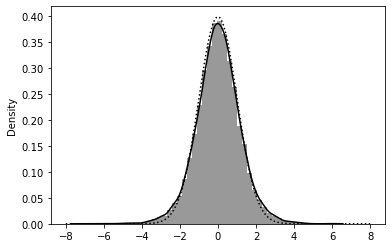

In [8]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
# t분포
sns.distplot(t_value_array, color='black')

# 표준정규분포의 확률밀도
x=np.arange(-8, 8.1,0.1)
plt.plot(x, stats.norm.pdf(x=x),
        color = 'black', linestyle='dotted')

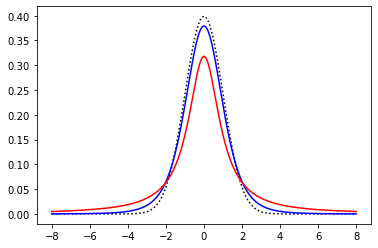

In [10]:
# 자유도 n이 커짐에 따라 표준정규분포 N(0,1)에 수렴
plt.plot(x, stats.norm.pdf(x=x),
        color='black',linestyle='dotted')
plt.plot(x, stats.t.pdf(x=x, df = 5),
        color = 'blue')
plt.plot(x, stats.t.pdf(x=x,df=1),
        color = 'red')

#### 일반선형모형 vs. 일반화선형모형  
일반선형모형과 일반화선형모형의 주요 차이점은 바로 접근의 차이이다. 일반선형모형(General linear model, 이하 GLM)은 엄격하게(strictly) 잔차들이 조건부 정규분포를 따른다고 가정하는 반면 일반화선형모형(Generalized linear model, 이하 GLiM)은 이 가정을 엄격하게 따르지 않는다. 즉, 잔차들이 exponential family 등 다양한 다른 분포를 가질 수 있다고 가정한다.

일반화선형모형은 종속변수에 적절한 link function을 적용하는 방법이다. 이는 오차항의 확률 분포를 무엇으로 보느냐에 따라 어느정도 정해져 있는데, 오차항의 확률분포가 binomial이면 link function은 logit이고, exponential이면 inverse, poisson이면 log를 link function으로 취한다.

#### 일반화선형모델과 관계가 깊은 확률분포
- 정규분포 이외의 확률분포를 사용할 수 있다는 것이 일반화선형모델의 큰 특징이며 
- 정규분포 이외에 이항분포, 푸아송분포 등 일반화선형모델과 관계가 깊은 확률분포가 있음
- 이항분포 : 정규분포와 달리 좌우 비대칭인 히스토그램 확인
- 푸아송 분포 : 카운트 데이터가 따르는 이산형 확률분포
 - 카운트 데이터가 0 이상의 정수라는 특징
 - 모수는 강도(일이 일어날 횟수에 대한 기댓값, 발생 강도) 람다밖에 없음
 - 푸아송 분포는 이항분포에서 도출할 수 있으며 푸아송 분포는 성공확률이 한없이 0에 가깝지만 시행횟수가 무한히 많은 이항분포임

In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
# 앞이 나올 확률이 50%인 동전을 2번 던져서 그중 1번 앞면일 확률
sp.stats.binom.pmf(k=1,n=2,p=0.5)

0.5

In [23]:
# 앞이 나올 확률이 20%인 동전을 10번 던져서 앞이 나온 수를 세는 시행을 5번 반복
np.random.seed(1)
sp.stats.binom.rvs(n=10,p=0.2,size=5)

array([2, 3, 0, 1, 1])

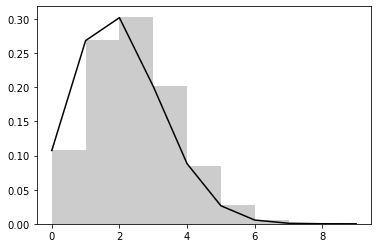

In [26]:
# 이항분포 : 정규분포와 달리 좌우 비대칭인 히스토그램 확인

# N=10, P=0.2인 이항분포
binomial = sp.stats.binom(n=10,p=0.2)
# 난수
np.random.seed(1)
rvs_binomial = binomial.rvs(size=10000)
# 확률질량함수
m = np.arange(0,10,1)
pmf_binomial = binomial.pmf(k=m)
# 난수의 히스토그램과 확률질량함수를 비교
sns.distplot(rvs_binomial, bins=m, kde=False,
            norm_hist=True, color='gray')
plt.plot(m,pmf_binomial, color='black')


[이항분포와 푸아송 분포의 관계]  
- 푸아송 분포는 1개, 또는 2개 등의 카운트 데이터가 따르는 이산형 확률분포
- 푸아송 분포의 모수는 강도(일이 일어날 횟수에 대한 기대값, 발생 강도) 람다밖에 없으며 기댓값과 분산도 람다값과 같다.
- 예를들어 하루의 교통사고 사상자수라는 카운트 데이터가 있다고 할 때 사고에 휘말릴 가능성이 있는 사람 수는 길을 걷고 있는 모든 사람 수이므로 N은 매우 큰 값이 되며 사고에 휘말릴 확률 p는 매우 작다. 일어나기 어려운 사건이지만 대상이 되는 사람 수가 굉장히 많을 때의 발생건수가 푸아송 분포를 따른다고 할 수 있다.
- 성공확률이 한없이 0에 가깝지만 시행횟수가 무한히 많은 이항분포라고 할 수 있다.

In [27]:
# 푸아송분포 : 강도가 5인 푸아송 분포에서 어떤 값(k) 2를 얻는 확률
sp.stats.poisson.pmf(k=2,mu=5)

0.08422433748856832

In [28]:
# λ(강도)=2인 푸아송분포를 따르는 난수
np.random.seed(1)
sp.stats.poisson.rvs(mu=2,size=5)

array([2, 1, 0, 1, 2])

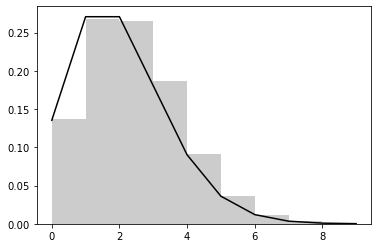

In [30]:
# λ=2인 푸아송 분포
poisson = sp.stats.poisson(mu=2)
# 난수
np.random.seed(1)
rvs_poisson = poisson.rvs(size=10000)
# 확률질량함수
m = np.arange(0,10,1)
pmf_poisson = poisson.pmf(k=m)
# 난수의 히스토그램과 확률질량함수 비교
sns.distplot(rvs_poisson, bins=m, kde=False,
            norm_hist=True,color='gray')
plt.plot(m,pmf_poisson,color='black' )